<a href="https://colab.research.google.com/github/MohebZandi/Comupter_Vision/blob/main/CIFAR10_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 classification

In [ ]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import copy
from sklearn.model_selection import train_test_split

# for importing data
import torchvision
import torchvision.transforms as T
from torch.utils.data import TensorDataset,DataLoader

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
# use GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Import and inspect the data

In [ ]:
# download the CIFAR10 dataset

cdata = torchvision.datasets.CIFAR10(root= 'cifar10', download= True)

print(cdata)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting cifar10/cifar-10-python.tar.gz to cifar10
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [ ]:
# inspect the data

# the categories (but how many letters??)
print(cdata.classes)
print(str(len(cdata.classes)) + ' classes')

print('\nData size:')
print(cdata.data.shape)

# .targets is a list of targets converted to ints
print(len(cdata.targets))
print(type(cdata.data))

# Creating variables for data reshaping
numPics = cdata.data.shape[0]
numPixels = cdata.data.shape[1]
numChans = cdata.data.shape[3]

# transform to 4D tensor for conv layers (and transform from int8 to float)
# images = cdata.data.view([numPics,numChans,numPixels,numPixels]).float()
# print('\nTensor data:')
# print(images.shape)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
10 classes

Data size:
(50000, 32, 32, 3)
50000
<class 'numpy.ndarray'>


<class 'torchvision.transforms.transforms.Compose'>
Data Shape:  (32, 32, 3)


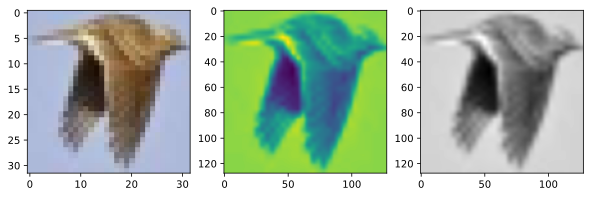

In [ ]:
Ts = T.Compose([T.ToTensor(),   # Compose function group together some transformers into one object
                T.Resize(32*4),
                T.Grayscale(num_output_channels= 1)
                ])
print(type(Ts))

# include the transform in the dataset
cdata.transform = Ts

print('Data Shape: ',cdata.data[123,:,:,:].shape)

# option 1: apply transform "externally" to an image
imageno = 123
img1 = Ts(cdata.data[imageno,:,:,:])

# option 2 : use the embedded transform
img2 = cdata.transform(cdata.data[imageno,:,:,:])

# let's see what we've done!
fig, ax = plt.subplots(1,3, figsize= (10, 3))
ax[0].imshow(cdata.data[imageno,:,:,:])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2), cmap= 'gray')

plt.show()

In [ ]:
print(type(img2))

<class 'torch.Tensor'>


In [ ]:
print(cdata.data.shape)

(50000, 32, 32, 3)


In [ ]:
# Creating variables for data reshaping
numPics = cdata.data.shape[0]
numPixels = cdata.data.shape[1]
numChans = cdata.data.shape[3]



<class 'int'>


## Change the type of data to Tensor in 4Dimensions


In [ ]:
print(cdata)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [ ]:
print(cdata.data.shape)

(50000, 32, 32, 3)


In [ ]:
print(type(cdata.data))

<class 'numpy.ndarray'>


In [ ]:
# Converting numpy array to torch Tensor
cdataT = torch.from_numpy(cdata.data)
print(type(cdataT))

<class 'torch.Tensor'>


In [ ]:
# Check the shape of the torch
print(cdataT.shape)

torch.Size([50000, 32, 32, 3])


In [ ]:
# Convert the shape to (Number of pics, number of channels, Number of H pixels, Number of W pixels)

numPics = cdataT.data.shape[0]
numPixels = cdataT.data.shape[1]
numChans = cdataT.data.shape[3]

# print(numPics)
# print(numPixels)
# print(numChans)
print('Original data Shape:\n',cdataT.data.shape)

images = cdataT.data.reshape([numPics, numChans, numPixels, numPixels]).float()
print('\nTensor data:\n',images.shape)

Original data Shape:
 torch.Size([50000, 32, 32, 3])

Tensor data:
 torch.Size([50000, 3, 32, 32])


In [ ]:

print(len(cdata.targets))
print(type(cdata.targets))
print(type(cdata.targets[0]))

50000
<class 'list'>
<class 'int'>


In [ ]:
# Converting the targets to torch tensor
labelsT = torch.tensor(cdata.targets)
print(type(labelsT))
print(labelsT.shape)

<class 'torch.Tensor'>
torch.Size([50000])


In [ ]:
# Finding the final label for the pics
for i in range(10):
    print(cdata.classes[cdata.targets[i]])

frog
truck
truck
deer
automobile
automobile
bird
horse
ship
cat


In [ ]:
random_list = np.random.randint(1, 100, 10)
random_list

array([71, 93, 34, 92, 70, 93, 68, 70, 21, 36])

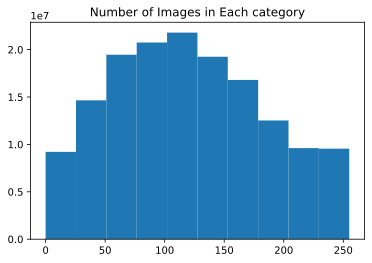

In [ ]:
# make a visualization of the number of images in each category
plt.hist(images[:,:,:,:].view(1,-1).detach(), 10)
plt.title('Number of Images in Each category')
plt.show()

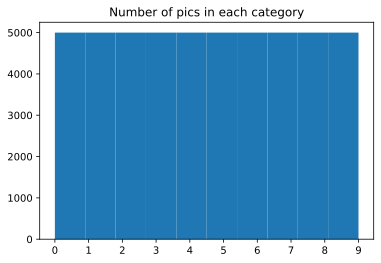

In [ ]:
plt.hist(labelsT.view(1,-1).detach(), 10)
plt.title('Number of pics in each category')
plt.xticks(ticks = range(0,10))
plt.show()

# Program start

In [27]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import copy
from sklearn.model_selection import train_test_split

# for importing data
import torchvision
import torchvision.transforms as T
from torch.utils.data import TensorDataset,DataLoader

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

# for getting summary info on models
from torchsummary import summary

In [28]:
# download the CIFAR10 dataset

cdata = torchvision.datasets.CIFAR10(root= 'cifar10', download= True)

print(cdata)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [29]:
# inspect the data

# the categories (but how many letters??)
print(cdata.classes)
print(str(len(cdata.classes)) + ' classes')

print('\nData size:')
print(cdata.data.shape)

# .targets is a list of targets converted to ints
print(len(cdata.targets))
print(type(cdata.data))

# Creating variables for data reshaping
numPics = cdata.data.shape[0]
numPixels = cdata.data.shape[1]
numChans = cdata.data.shape[3]

# Converting numpy array to torch Tensor
cdataT = torch.from_numpy(cdata.data)
print(type(cdataT))

# Convert the shape to (Number of pics, number of channels, Number of H pixels, Number of W pixels)

print('\nOriginal data Shape:\n',cdataT.data.shape)


images = cdataT.data.reshape([numPics, numChans, numPixels, numPixels]).float()
print('\nTensor data:\n',images.shape)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
10 classes

Data size:
(50000, 32, 32, 3)
50000
<class 'numpy.ndarray'>
<class 'torch.Tensor'>

Original data Shape:
 torch.Size([50000, 32, 32, 3])

Tensor data:
 torch.Size([50000, 3, 32, 32])


In [30]:
# Converting the targets to torch tensor
labelsT = torch.tensor(cdata.targets).long()
print(type(labelsT))
print(labelsT.shape)
print(torch.unique(labelsT))

<class 'torch.Tensor'>
torch.Size([50000])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [31]:
# Finding the final label for the pics
random_list = np.random.randint(1, 100, 10)
for i in random_list:
    print(cdata.classes[cdata.targets[i]])

deer
deer
bird
horse
airplane
automobile
horse
automobile
deer
cat


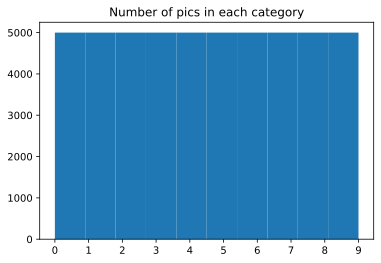

In [32]:
plt.hist(labelsT.view(1,-1).detach(), 10)
plt.title('Number of pics in each category')
plt.xticks(ticks = range(0,10))
plt.show()

## Create train/test groups using DataLoader

In [33]:
train_data, test_data, train_labels, test_labels = train_test_split(images, labelsT, test_size= 0.1)

# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [34]:
# checking the size of train data and train labels

print(len(next(iter(train_loader))[0]))
print(len(next(iter(train_loader))[1]))
# print(next(iter(train_loader)))
train_loader.dataset.tensors[0].shape

32
32


torch.Size([45000, 3, 32, 32])

### Create the DL model

In [35]:
# create a class for the model
def createTheCIFARNet(printtoggle=False):

  class cifarNet(nn.Module):
    def __init__(self,printtoggle):
      super().__init__()

      ### convolution layers
      self.conv1 = nn.Conv2d( 3,10,kernel_size=5,stride=1,padding=1)
      # size : np.floor((32 + 2*1 - 5)/1 ) + 1 = 30  ---> maxpool --> 30/2 = 15

      self.conv2 = nn.Conv2d(10,20,kernel_size=5,stride=1,padding=1)
      # size: np.floor(( 15 + 2*1 - 5)/1) + 1 = 13 ---> maxpool --> 13/2 = 6

      # compute the number of units in FClayer (number of outputs of conv2)
      expectSize = np.floor( (6+2*0-1)/1 ) + 1 # fc1 layer has no padding or kernel, so set to 0/1
      expectSize = 20*int(expectSize**2)
      
      ### fully-connected layer
      self.fc1 = nn.Linear(expectSize,50)

      ### output layer
      self.out = nn.Linear(50,10)

      # toggle for printing out tensor sizes during forward prop
      self.print = printtoggle

    # forward pass
    def forward(self,x):
      
      print(f'Input: {x.shape}') if self.print else None

      # convolution -> maxpool -> relu
      x = F.relu(F.max_pool2d(self.conv1(x),2))
      print(f'Layer conv1/pool1: {x.shape}') if self.print else None

      # and again: convolution -> maxpool -> relu
      x = F.relu(F.max_pool2d(self.conv2(x),2))
      print(f'Layer conv2/pool2: {x.shape}') if self.print else None

      # reshape for linear layer
      nUnits = x.shape.numel()/x.shape[0]
      x = x.view(-1,int(nUnits))
      if self.print: print(f'Vectorize: {x.shape}')
      
      # linear layers
      x = F.relu(self.fc1(x))
      if self.print: print(f'Layer fc1: {x.shape}')
      x = self.out(x)
      if self.print: print(f'Layer out: {x.shape}')

      return x
  
  # create the model instance
  net = cifarNet(printtoggle)
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [36]:
# test the model with one batch
net,lossfun,optimizer = createTheCIFARNet(True)

X,y = iter(train_loader).next()
yHat = net(X)

# check sizes of model outputs and target variable
print(' ')
print(yHat.shape)
print(y.shape)

# now let's compute the loss
loss = lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss)

Input: torch.Size([32, 3, 32, 32])
Layer conv1/pool1: torch.Size([32, 10, 15, 15])
Layer conv2/pool2: torch.Size([32, 20, 6, 6])
Vectorize: torch.Size([32, 720])
Layer fc1: torch.Size([32, 50])
Layer out: torch.Size([32, 10])
 
torch.Size([32, 10])
torch.Size([32])
 
Loss:
tensor(5.5894, grad_fn=<NllLossBackward0>)


In [37]:
# count the total number of parameters in the model
summary(net,(3,32,32))

Input: torch.Size([2, 3, 32, 32])
Layer conv1/pool1: torch.Size([2, 10, 15, 15])
Layer conv2/pool2: torch.Size([2, 20, 6, 6])
Vectorize: torch.Size([2, 720])
Layer fc1: torch.Size([2, 50])
Layer out: torch.Size([2, 10])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 30, 30]             760
            Conv2d-2           [-1, 20, 13, 13]           5,020
            Linear-3                   [-1, 50]          36,050
            Linear-4                   [-1, 10]             510
Total params: 42,340
Trainable params: 42,340
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.09
Params size (MB): 0.16
Estimated Total Size (MB): 0.27
----------------------------------------------------------------


### Create a function that trains the model

In [41]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 30
  
  # create a new model
  net,lossfun,optimizer = createTheCIFARNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    net.train()
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    net.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net


In [42]:
%%time
trainAcc,testAcc,losses,net = function2trainTheModel()

CPU times: user 12min 52s, sys: 20.5 s, total: 13min 12s
Wall time: 13min 15s


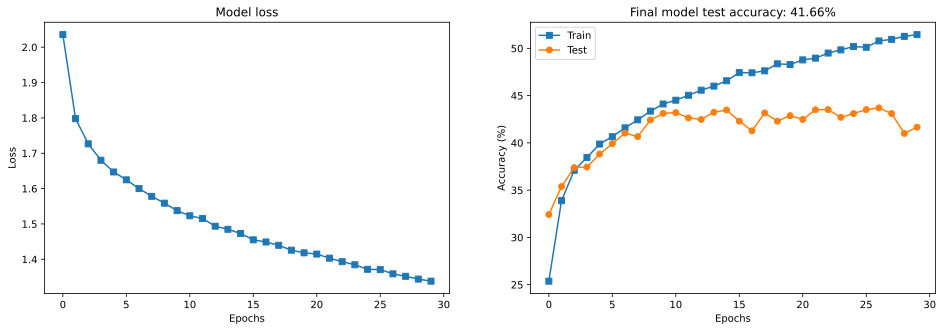

In [43]:
#    30 epochs    ------------> about    mins to proccess


fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses,'s-')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,'s-',label='Train')
ax[1].plot(testAcc,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

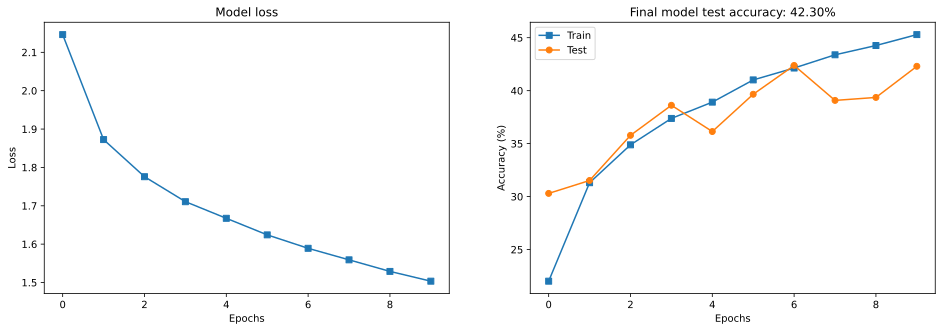

In [40]:
#    10 epochs    ------------> about 5 mins to proccess

# fig,ax = plt.subplots(1,2,figsize=(16,5))

# ax[0].plot(losses,'s-')
# ax[0].set_xlabel('Epochs')
# ax[0].set_ylabel('Loss')
# ax[0].set_title('Model loss')

# ax[1].plot(trainAcc,'s-',label='Train')
# ax[1].plot(testAcc,'o-',label='Test')
# ax[1].set_xlabel('Epochs')
# ax[1].set_ylabel('Accuracy (%)')
# ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
# ax[1].legend()

# plt.show()